# Health Care Cost Predictor

The data for this example is located in Kaggle in the following [URL](https://www.kaggle.com/datasets/mirichoi0218/insurance), but the modified file for this class is located [here](../../data/insurance_2.csv)

## Context of the data

The content is adapted from kaggle. 

The datasets utilized in 'Machine Learning with R' by Brett Lantz are a valuable resource for learners, providing a foundation for hands-on experience with machine learning concepts. Although Packt Publishing does not make these datasets readily available online, they can be accessed through public domain sources, requiring only minor preprocessing and formatting to match the book's specifications. This presents an opportunity for readers to engage deeply with the material, reproducing and building upon the book's examples to reinforce their understanding of machine learning principles.

## Variables

**age**: age of primary beneficiary

**sex**: insurance contractor gender, female, male

**bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight $\left(kg / m^2\right)$ using the ratio of height to weight, ideally 18.5 to 24.9

**children**: Number of children covered by health insurance / Number of dependents

**smoker**: Smoking

**salary**: Salary of the insurance contractor

**region**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

**charges**: Individual medical costs billed by health insurance

## Configuration of solution

In [1]:
data_path = "../../data/"

## Library Load

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm

## Data Load

In [3]:
data = pd.read_csv(data_path+"insurance_2.csv")

In [4]:
num_gpus = torch.cuda.device_count()
print(f"Number of GPUs available: {num_gpus}")
for i in range(num_gpus):
    print(f"GPU {i}: {torch.cuda.get_device_name(i)}")

device = 0  # "Select the index of the GPU you wish to use"
torch.cuda.set_device(device)
print(f"GPU selection: {torch.cuda.get_device_name(device)}")

Number of GPUs available: 1
GPU 0: NVIDIA GeForce MX110
GPU selection: NVIDIA GeForce MX110


## Understanding the data

1. Loading and summarizing data
2. Visualizing distributions
3. Exploring relationships between variables
4. Analyzing categorical variables

### 1. Loading and summarizing data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   salary    1338 non-null   float64
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 83.8+ KB


In [6]:
data.describe()

,age,bmi,children,salary,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,159064.411451,13270.422265
std,14.049960,6.098187,1.205493,41741.994963,12110.011237
min,18.000000,15.960000,0.000000,104622.922023,1121.873900
25%,27.000000,26.296250,0.000000,130087.161933,4740.287150
50%,39.000000,30.400000,1.000000,146740.897257,9382.033000
75%,51.000000,34.693750,2.000000,171897.191284,16639.912515
max,64.000000,53.130000,5.000000,338460.517246,63770.428010


In [7]:
data.select_dtypes("object")

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [8]:
data["sex"] = data["sex"].astype("category")
data["smoker"] = data["smoker"].astype("category")
data["region"] = data["region"].astype("category")

In [9]:
data.select_dtypes("number")

,age,bmi,children,salary,charges
0,19,27.900,0,159272.812482,16884.92400
1,18,33.770,1,117088.625944,1725.55230
2,28,33.000,3,129043.852213,4449.46200
3,33,22.705,0,194635.486180,21984.47061
4,32,28.880,0,113585.904592,3866.85520
...,...,...,...,...,...
1333,50,30.970,3,145933.927725,10600.54830
1334,18,31.920,0,117665.917758,2205.98080
1335,18,36.850,0,133402.353115,1629.83350
1336,21,25.800,0,133975.682996,2007.94500


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   salary    1338 non-null   float64 
 6   region    1338 non-null   category
 7   charges   1338 non-null   float64 
dtypes: category(3), float64(3), int64(2)
memory usage: 56.8 KB


### 2. Visualizing distributions

<Axes: xlabel='bmi', ylabel='Probability'>

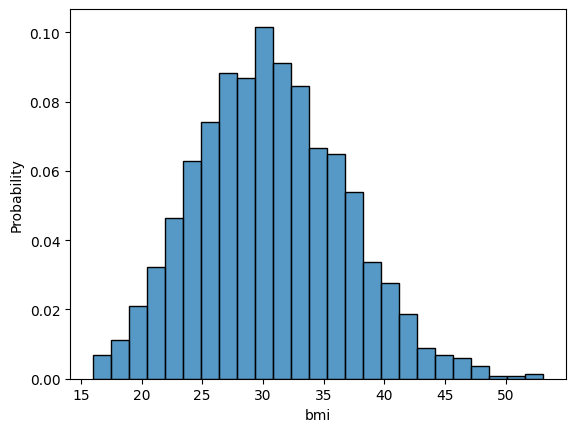

In [11]:
sns.histplot(data["bmi"], stat="probability")

### 3. Exploring relationships between variables

<Axes: xlabel='bmi', ylabel='charges'>

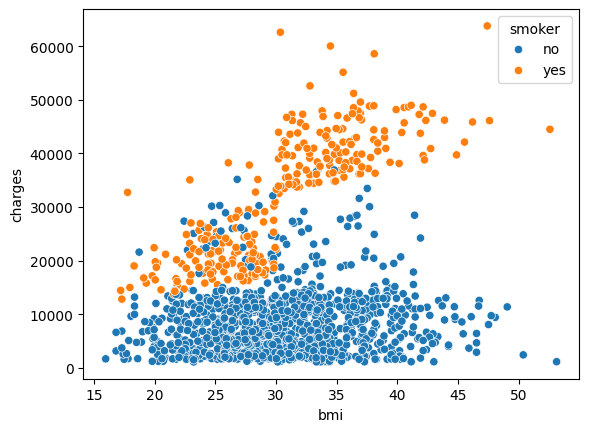

In [12]:
sns.scatterplot(data=data, x="bmi", y="charges", hue="smoker")


### 4. Analyzing categorical variables

<Axes: xlabel='smoker', ylabel='probability'>

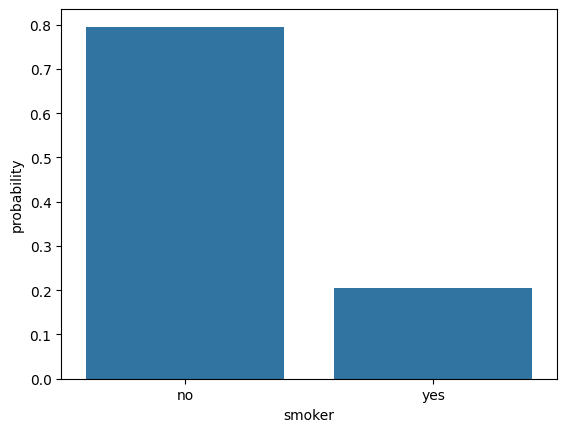

In [13]:
sns.countplot(data=data, x="smoker", stat="probability")

<Axes: xlabel='smoker', ylabel='charges'>

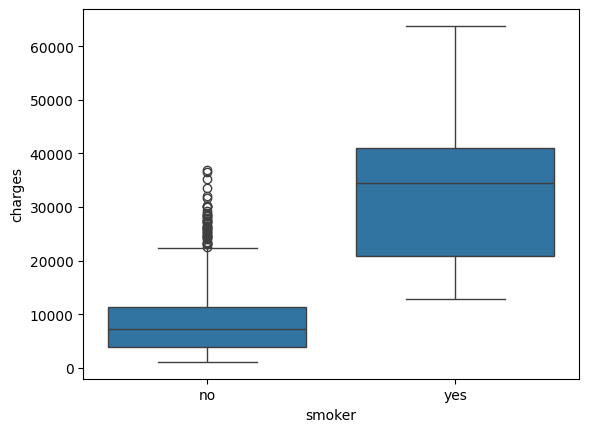

In [14]:
sns.boxplot(data=data, y="charges", x="smoker")

<Axes: xlabel='sex', ylabel='charges'>

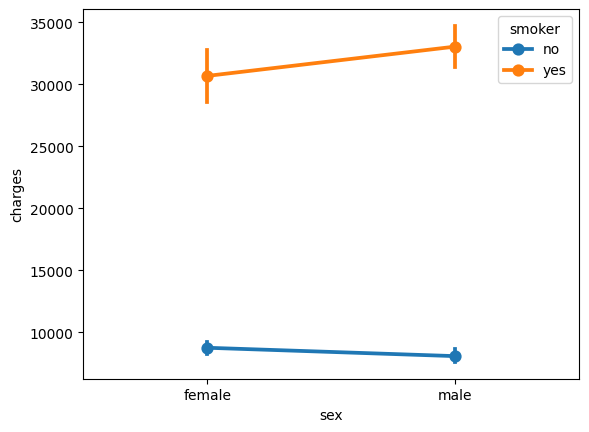

In [15]:
sns.pointplot(data=data, x="sex", y="charges", hue="smoker")

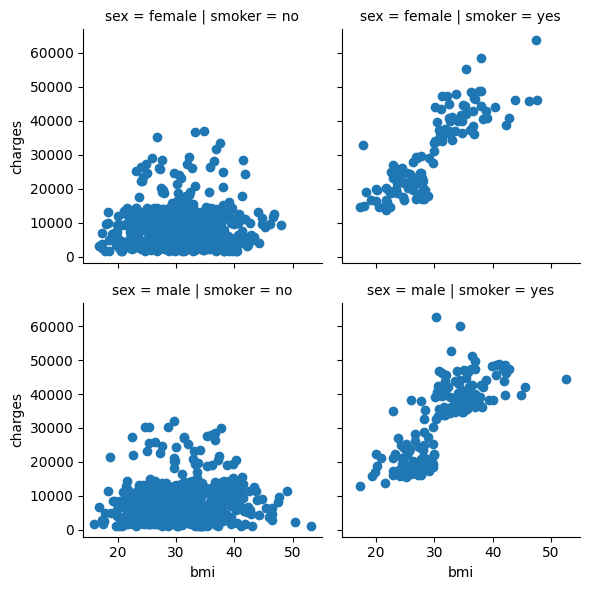

In [16]:
g001 = sns.FacetGrid(data=data, col="smoker", row="sex")
g001.map(plt.scatter, "bmi", "charges")

<Axes: xlabel='salary', ylabel='charges'>

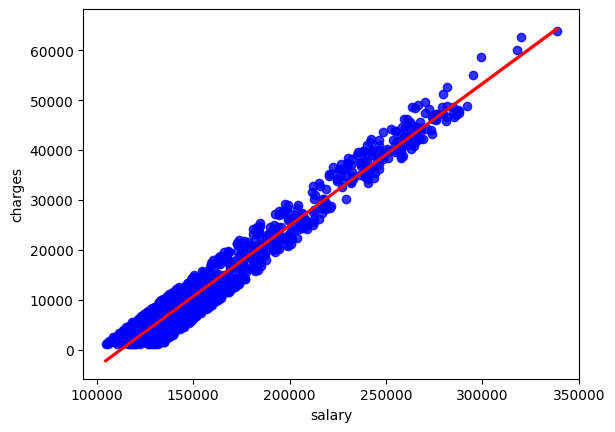

In [17]:
sns.regplot(data=data, x="salary", y="charges",
            scatter_kws={"color": "blue"},  # Color de los puntos
            line_kws={"color": "red"})

## 5. Checking availability of GPU

In [30]:
device1 = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device1}")
device1

Using device: cuda:0


device(type='cuda', index=0)

## 6. Splitting data

In [19]:
entrada = data["salary"].to_numpy().reshape(-1, 1)
salida = data["charges"].to_numpy().reshape(-1, 1)

In [20]:
standarScaler_features = StandardScaler().fit(entrada)
standarScaler_output = StandardScaler().fit(salida)

In [21]:
salary_train, salary_test, charges_train, charges_test = train_test_split(
    standarScaler_features.transform(entrada),
    standarScaler_output.transform(salida),
    train_size=0.7,
    shuffle=True,
)

## 7. Converting Data To Tensor

In [22]:
t_salary_train = torch.tensor(salary_train, dtype=torch.float32, device=device1)
t_salary_test = torch.tensor(salary_test, dtype=torch.float32, device=device1)
t_charges_train = torch.tensor(charges_train, dtype=torch.float32, device=device1)
t_charges_test = torch.tensor(charges_test, dtype=torch.float32, device=device1)

## 8. Model Implementation

In [23]:
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

In [24]:
model = LinearRegression().to(device1)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

## 10. Train Model

In [25]:
num_epochs = 1000
for epoch in range(num_epochs):

     # Fordward Pass and loss

     charges_predicted = model(t_salary_train)
     loss = criterion(charges_predicted, t_charges_train)

     # Backward pass
     loss.backward()

     #wweights update
     optimizer.step()
     optimizer.zero_grad()

     # Progress tracking

     if (epoch+1)%10 ==0:
          print(f"Epoch: {epoch+1}, loss={loss.item():.4f}")


Epoch: 10, loss=1.2763
Epoch: 20, loss=0.8460
Epoch: 30, loss=0.5655
Epoch: 40, loss=0.3828
Epoch: 50, loss=0.2637
Epoch: 60, loss=0.1861
Epoch: 70, loss=0.1355
Epoch: 80, loss=0.1026
Epoch: 90, loss=0.0811
Epoch: 100, loss=0.0671
Epoch: 110, loss=0.0579
Epoch: 120, loss=0.0520
Epoch: 130, loss=0.0481
Epoch: 140, loss=0.0456
Epoch: 150, loss=0.0439
Epoch: 160, loss=0.0428
Epoch: 170, loss=0.0421
Epoch: 180, loss=0.0417
Epoch: 190, loss=0.0414
Epoch: 200, loss=0.0412
Epoch: 210, loss=0.0411
Epoch: 220, loss=0.0410
Epoch: 230, loss=0.0409
Epoch: 240, loss=0.0409
Epoch: 250, loss=0.0409
Epoch: 260, loss=0.0408
Epoch: 270, loss=0.0408
Epoch: 280, loss=0.0408
Epoch: 290, loss=0.0408
Epoch: 300, loss=0.0408
Epoch: 310, loss=0.0408
Epoch: 320, loss=0.0408
Epoch: 330, loss=0.0408
Epoch: 340, loss=0.0408
Epoch: 350, loss=0.0408
Epoch: 360, loss=0.0408
Epoch: 370, loss=0.0408
Epoch: 380, loss=0.0408
Epoch: 390, loss=0.0408
Epoch: 400, loss=0.0408
Epoch: 410, loss=0.0408
Epoch: 420, loss=0.0408
E

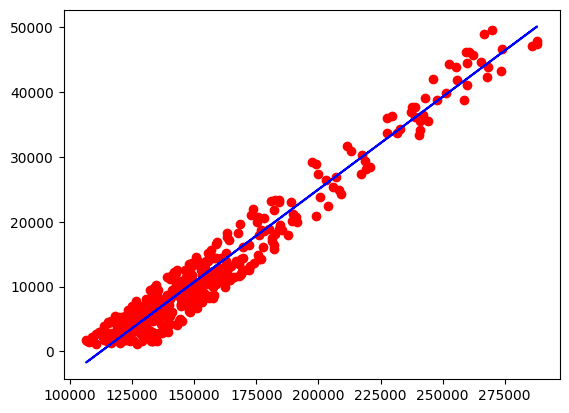

In [26]:
with torch.no_grad():
    prediction = model(t_salary_test)
    mse = mean_squared_error(t_charges_test.cpu().numpy(), prediction.cpu().numpy())
    r2 = r2_score(t_charges_test.cpu().numpy(), prediction.cpu().numpy())

    plt.plot(
        standarScaler_features.inverse_transform(salary_test),
        standarScaler_output.inverse_transform(charges_test),
        "ro",
    )
    plt.plot(
        standarScaler_features.inverse_transform(salary_test),
        standarScaler_output.inverse_transform(prediction.cpu().numpy()),
        "b",
    )

## Model Performance

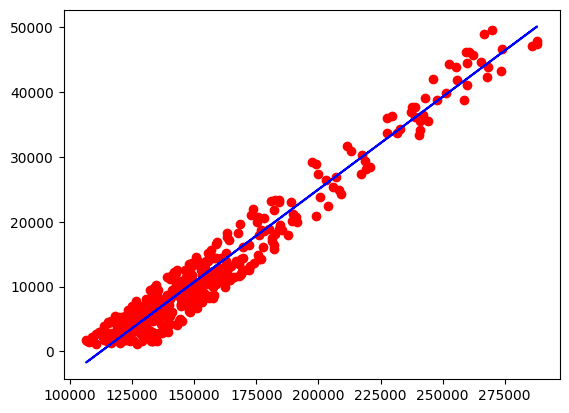

In [27]:
with torch.no_grad():
    prediction = model(t_salary_test)
    mse = mean_squared_error(t_charges_test.cpu().numpy(), prediction.cpu().numpy())
    r2 = r2_score(t_charges_test.cpu().numpy(), prediction.cpu().numpy())

    plt.plot(
        standarScaler_features.inverse_transform(salary_test),
        standarScaler_output.inverse_transform(charges_test),
        "ro",
    )
    plt.plot(
        standarScaler_features.inverse_transform(salary_test),
        standarScaler_output.inverse_transform(prediction.cpu().numpy()),
        "b",
    )

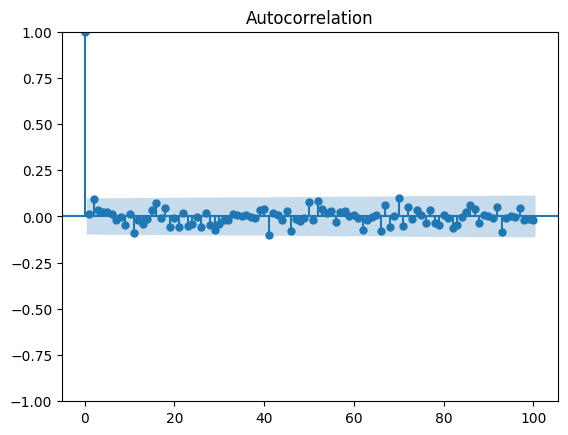

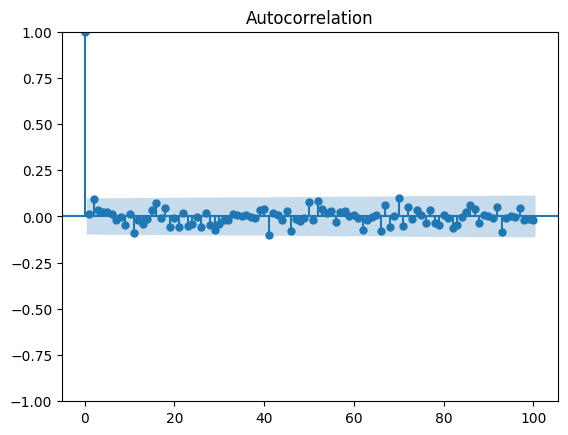

In [28]:
s_predicha = standarScaler_output.inverse_transform(prediction.cpu().numpy())
s_real = standarScaler_output.inverse_transform(charges_test)

residuos = s_real- s_predicha

sm.graphics.tsa.plot_acf(residuos, lags=100)
